<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [2]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [3]:
df.dtypes.value_counts()


object     12
float64     1
Name: count, dtype: int64

In [4]:
missing_values = df.isnull().mean()*100
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [5]:
# For Checking Duplicates use duplicated()
# Use drop_duplicates to Drop()
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])
df = df.drop_duplicates()
print("Shape after removing duplicates: ", df.shape)

Number of duplicate rows:  483
Shape after removing duplicates:  (10358, 13)


### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [6]:
df['Installs'] = df['Installs'].str.replace(',', '',regex=False)
df['Installs'] = df['Installs'].str.replace('+', '',regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').astype('Int64')
print(df['Installs'].head())


    

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: Int64


In [7]:
# use to_numeric to convert to int

**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [8]:
# Same as Above
df['Price'] = df['Price'].str.replace('$', '',regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype('Float64')
print(df['Price'].head())   


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: Float64


**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [9]:
# Hint: Define a function clean_size(x).
# Hint: If 'M' in x: return float(x.replace('M', '')) * 1000000
# Hint: Handle the 'Varies with device' edge case carefully.

def clean_size(x):
    x = str(x)
    if 'M' in x:
        # Convert 19M to 19000000
        return float(x.replace('M', '')) * 1000000
        
    elif 'k' in x:
        # Convert 500k to 500000
        return float(x.replace('k', '')) * 1000
        
    elif 'Varies with device' in x:
        # Handle string edge case
        return np.nan
        
    else:
        # Attempt to convert or return NaN
        try:
            return float(x)
        except:
            return np.nan
        
df['Size'] = df['Size'].apply(clean_size)
print(df['Size'].head())

# Use apply Method to apply above fun

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64


### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

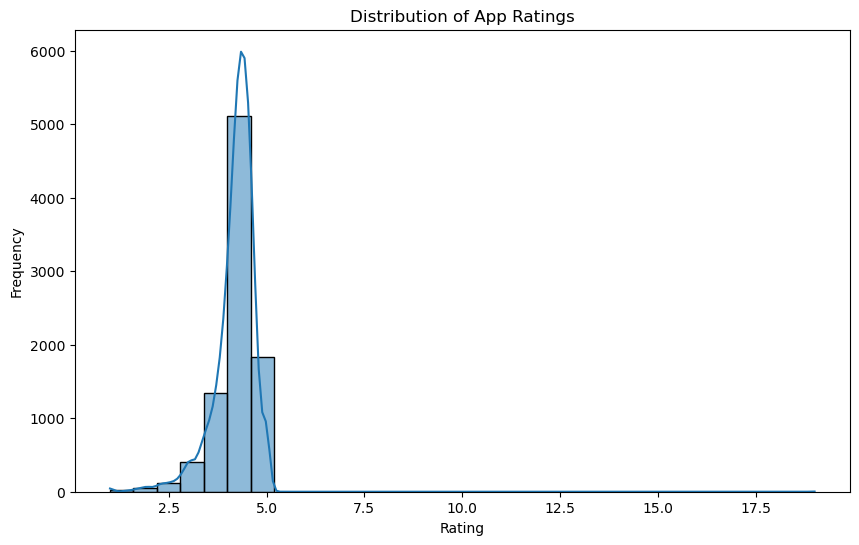

In [10]:
# **Exercise 8: Analyzing Missing 'Rating'**
# * The `Rating` column has missing values.
# * **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [11]:
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))
print(df['Rating'].head())

#After this use transform Method

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64


**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [12]:
# dropna
df= df.dropna()
print(df)


                                                     App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
...                                                  ...             ...   
10835                                           FR Forms        BUSINESS   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

       Rating Reviews        Size  Installs  Type  Price Content Rating  \
0        4.1

### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

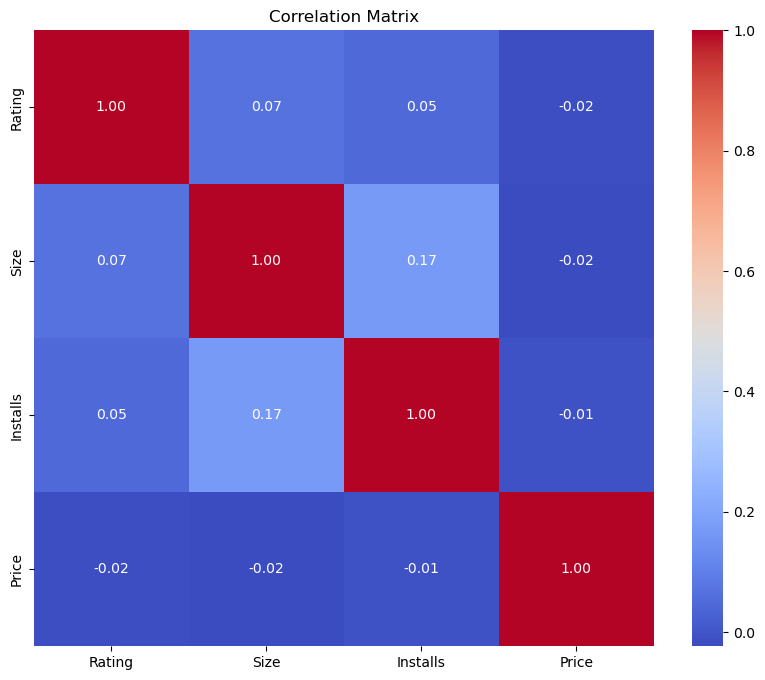

In [13]:

# Hint: numeric_only Use CORR

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

In [14]:
# Hint: sns.heatmap



**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

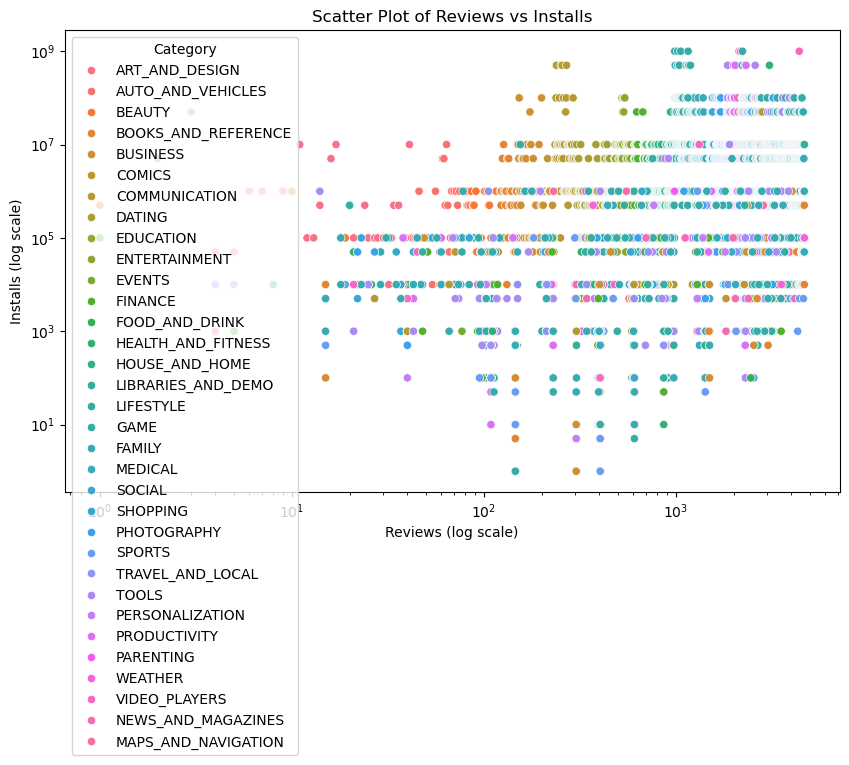

In [15]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Installs',hue='Category')
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Reviews vs Installs')
plt.xlabel('Reviews (log scale)')
plt.ylabel('Installs (log scale)')
plt.show()

In [16]:
# If needed
#plt.xscale('log')
#plt.yscale('log')
#plt.title('Reviews vs Installs (Log Scale)')
#plt.show()

**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

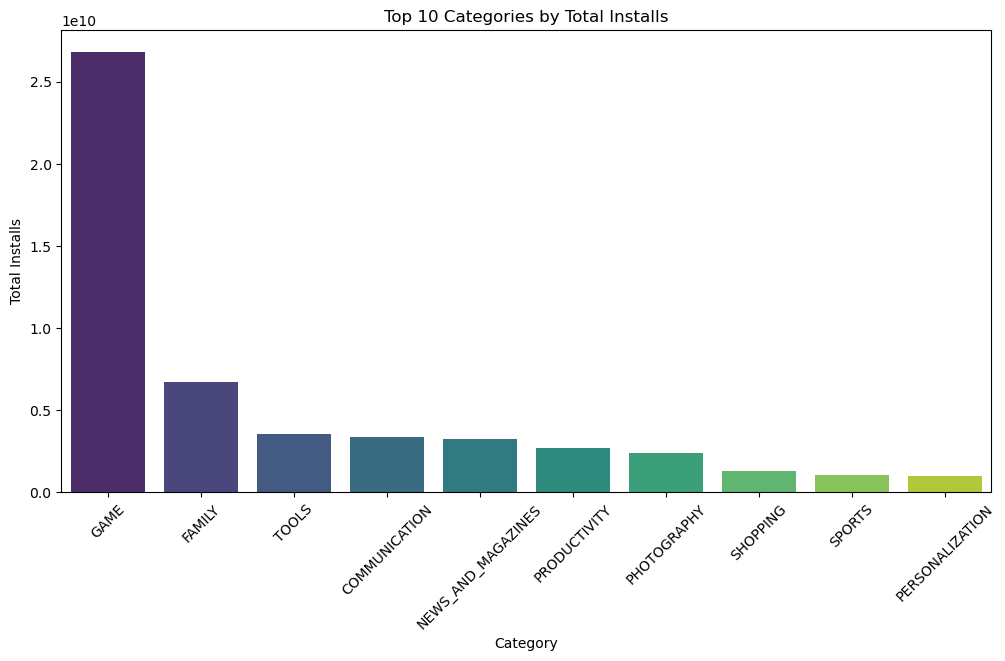

In [17]:
# **Exercise 14: Categorical Aggregation**
# * Create a Bar Plot showing the top 10 Categories by **Total Installs**.'

top_cats = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cats.index, y=top_cats.values, palette='viridis', hue=top_cats.index)
plt.xticks(rotation=45)
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()

### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
* Create a Scikit-Learn `ColumnTransformer` that:
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

In [21]:
# **Exercise 15: Preprocessing Pipeline**
# * Imagine you want to predict the `Rating` (Target).
# * Create a Scikit-Learn `ColumnTransformer` that:
#     1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
#     2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
# * Display the pipeline object.

df.to_csv('cleaned_googleplaystore.csv', index=False);

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['Reviews', 'Size', 'Installs', 'Price']),
#         ('cat', OneHotEncoder(), ['Category', 'Content Rating'])
#     ])
# print(preprocessor)

# Without Pipline

In [19]:
from sklearn.preprocessing import StandardScaler



# Use

# With Pipline(Optional part)

In [20]:

# Hint: from sklearn.compose import ColumnTransformer
# Hint: from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Hint: from sklearn.pipeline import Pipeline


